In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [7]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 50.8 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 52.4 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [10]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [12]:
df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [13]:
df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [14]:
df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [15]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [16]:
audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [17]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [18]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [19]:
#df_text_complete.head()

In [20]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [21]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [22]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
#df_audio_text_complete.head()

In [24]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [25]:
df_audio_text_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv')

In [26]:
df_audio_text_complete.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820365,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058321e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487106e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583816e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-

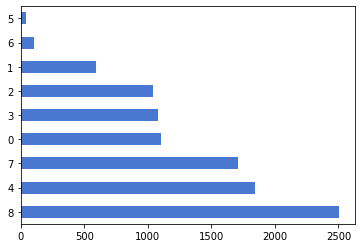

In [27]:
df_audio_text_complete['label'].value_counts().plot.barh()

In [28]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete[df_audio_complete['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_audio_text_subset.head()

(7523, 191)


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,7,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

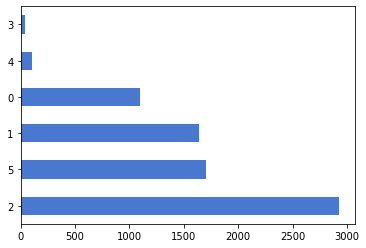

In [29]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [30]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_fullset['label'] = df_audio_text_complete['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,6,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820365,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058321e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487106e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583816e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-

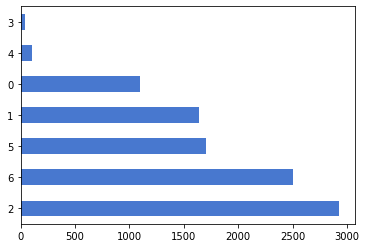

In [31]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [32]:
df_audio_text_subset.columns[2:-1]

Index(['sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic',
       'auto_corr_max', 'auto_corr_std', 'Var_1', 'Var_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=188)

In [33]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_subset.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397352,-2.461403,-0.556470,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160

In [34]:
X_audio_text=df_audio_text_subset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_subset['label']

In [35]:
y_audio_text.head()

0    5
1    2
3    4
4    5
6    0
Name: label, dtype: int64

In [36]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys_new = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [37]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [38]:
X_train_val_split.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
166,0.017942,0.031342,0.022258,0.022002,0.403030,-0.005938,0.742587,2.397591,-429.49432,164.03632,-23.189760,6.851655,25.024965,-9.552565,2.042094,-1.172174,-14.276101,0.670471,3.341360,0.092268,2.928437,-0.221531,3.556890,4.070158,-2.151462,1.387083,-0.802092,-4.921184,3.213553,2.703009,-2.254634,2.313682,0.474537,-3.630882,0.864783,2.078516,-0.884945,-1.699253,-1.913960,-0.754907,...,0.000078,0.000028,0.000010,4.628867e-06,1.047630e-06,1.170834e-07,1.709204e-09,4.901892e-11,3.394717e-11,3.041246e-11,2.748746e-11,2.485971e-11,2.257335e-11,2.051539e-11,1.864305e-11,1.697836e-11,1.547756e-11,1.411534e-11,1.289023e-11,1.178548e-11,1.078965e-11,9.899539e-12,9.086948e-12,8.370945e-12,7.723522e-12,7.140971e-12,6.625532e-12,6.162471e-12,5.751158e-12,5.385959e-12,5.065488e-12,4.783916e-12,4.538274e-12,4.329598e-12,4.152392e-12,4.008346e-12,3.893092e-12,3.811359e-12,3.761150e-12,presents ? it was only a trivial little brooch .
3051,0.008716,0.013027,0.011047,0.006900,0.195860,-0.005009,0.114097,0.352914,-491.94540,193.07785,-36.729076,10.882752,30.053465,-18.376696,0.534084,2.210285,-11.872421,0.737834,-6.500321,-11.221124,-0.823760,-4.523369,-4.575129,-0.122309,-0.775073,0.206899,-4.271661,-4.975174,-0.356861,-4.837292,-4.262958,0.878845,-2.292101,-0.846671,2.513476,-0.128088,0.745162,1.970042,1.344700,3.056888,...,0.000025,0.000014,0.000005,1.612021e-06,3.516347e-07,3.030370e-08,1.106159e-09,1.628417e-10,1.396167e-10,1.270728e-10,1.153584e-10,1.039928e-10,9.370433e-11,8.426925e-11,7.566738e-11,6.804501e-11,6.123309e-11,5.512896e-11,4.972380e-11,4.492490e-11,4.066405e-11,3.690770e-11,3.353738e-11,3.060646e-11,2.798329e-11,2.565973e-11,2.362373e-11,2.182037e-11,2.023317e-11,1.884043e-11,1.762554e-11,1.656543e-11,1.564964e-11,1.487238e-11,1.421885e-11,1.368934e-11,1.326825e-11,1.296664e-11,1.278233e-11,oh yeah absolutely . you know and especially b...
28,0.022226,0.065892,0.028078,0.059589,0.751908,0.013184,3.946733,21.534090,-399.85867,97.55426,5.852170,12.156615,18.102240,0.030100,0.248833,-1.614392,-6.232922,-2.151576,-0.161687,2.737938,3.747085,0.953868,3.661918,3.766247,0.436801,1.589752,-1.180943,-4.872811,-1.941888,-1.377714,-3.436214,-2.909748,-1.962951,-0.300011,0.232454,-1.345198,-0.901959,0.097359,0.193014,1.150980,...,0.002978,0.001291,0.000330,1.099311e-04,1.379914e-05,8.292041e-06,7.133601e-07,1.558829e-08,2.390412e-11,1.524686e-11,1.130444e-11,8.531746e-12,6.572208e-12,5.142802e-12,4.083082e-12,3.290661e-12,2.686461e-12,2.216965e-12,1.848100e-12,1.559329e-12,1.326976e-12,1.138692e-12,9.844864e-13,8.616873e-13,7.574133e-13,6.692837e-13,5.980590e-13,5.382131e-13,4.891986e-13,4.437898e-13,4.113193e-13,3.784558e-13,3.514070e-13,3.297014e-13,3.137690e-13,2.982934e-13,2.882208e-13,2.800474e-13,2.746888e-13,okay . is that is that
6823,0.016387,0.025799,0.020630,0.015449,0.233803,-0.006504,0.467644,1.151403,-432.85650,202.01822,-33.683940,-14.513482,19.241781,-13.453171,-5.184056,-2.686533,-14.577132,-3.444175,-1.968779,-1.944344,7.658189,1.879357,-3.164622,0.038420,-3.159185,-3.832730,-2.501854,-3.671763,-2.569216,-4.016309,-4.617719,-2.444710,-4.631723,-3.894447,-0.770353,-2.563013,-0.135067,3.615406,0.051620,-1.428340,...,0.000040,0.000010,0.000003,8.331350e-07,1.094051e-07,1.659063e-08,2.273056e-09,1.481168e-09,1.329155e-09,1.193690e-09,1.074334e-09,9.637594e-10,8.665111e-10,7.790314e-10,7.001697e-10,6.307665e

In [39]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [40]:
X_train_split.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
4549,0.003147,0.007265,0.004119,0.006420,0.290323,-0.007696,0.045525,0.111776,-541.81287,157.54958,-22.169266,22.109842,24.261385,-7.964699,9.781030,-9.237029,-13.747606,10.681236,-2.859840,-6.811216,1.801633,-5.613183,1.320153,3.307938,-5.086665,0.783248,-1.622731,-6.887631,-1.071605,-2.997023,-3.766563,0.178243,-1.403018,0.727649,1.263158,-2.382723,0.759675,3.645043,3.742463,4.582254,...,0.000165,6.813421e-05,4.739329e-05,1.684610e-05,2.799017e-06,9.094237e-08,2.324356e-08,1.878315e-08,1.621756e-08,1.407327e-08,1.232767e-08,1.082293e-08,9.562356e-09,8.473730e-09,7.525477e-09,6.712904e-09,6.005719e-09,5.383338e-09,4.840199e-09,4.363180e-09,3.943792e-09,3.575580e-09,3.247774e-09,2.963438e-09,2.708998e-09,2.484744e-09,2.288432e-09,2.114640e-09,1.961681e-09,1.827339e-09,1.710385e-09,1.608549e-09,1.520133e-09,1.445613e-09,1.382404e-09,1.331320e-09,1.290750e-09,1.261501e-09,1.243558e-09,i m sorry sir .
7921,0.006259,0.011003,0.007821,0.007730,0.337364,-0.005623,0.092080,0.472167,-492.59027,146.34596,-8.497099,27.034056,24.166950,-12.546513,10.933343,6.059605,-9.617927,3.356515,-2.324981,-4.453494,4.540427,-2.065795,-0.348606,4.532716,-0.185177,3.216626,2.522645,-3.990159,-1.698643,-1.884438,-3.253496,-1.522834,-4.681767,-4.604871,-2.180960,-5.059082,-3.987904,-0.439390,-0.804751,-0.176852,...,0.000279,1.231265e-04,3.944791e-05,8.699324e-06,1.184124e-06,9.190524e-08,1.623266e-09,1.155122e-11,5.334261e-13,4.409489e-13,3.898820e-13,3.491105e-13,3.147307e-13,2.838422e-13,2.558925e-13,2.310831e-13,2.088652e-13,1.888241e-13,1.709396e-13,1.550266e-13,1.408012e-13,1.282139e-13,1.168660e-13,1.069682e-13,9.804981e-14,9.011584e-14,8.318266e-14,7.707305e-14,7.175116e-14,6.699471e-14,6.269527e-14,5.887679e-14,5.563321e-14,5.290526e-14,5.064568e-14,4.880756e-14,4.732986e-14,4.627127e-14,4.562551e-14,no so is everyone else in the long run . let s...
4173,0.006476,0.013418,0.008164,0.010634,0.598253,-0.007376,0.147426,0.260881,-546.75775,163.54288,-17.220620,11.304126,33.136730,-8.534730,-4.278367,8.283150,0.357609,-4.434469,-8.694298,-4.376583,1.327891,0.571644,2.974321,-2.431613,-6.760472,1.947958,0.181784,-6.286667,-1.600338,-0.194460,-1.883663,-2.716150,-3.578821,2.663736,2.570171,-6.310481,-2.058319,4.612625,-0.001416,-0.544703,...,0.000044,2.918401e-05,1.052347e-05,1.090679e-06,1.212805e-07,1.064523e-08,6.220263e-10,4.073369e-11,2.400869e-11,1.949949e-11,1.617611e-11,1.355598e-11,1.150151e-11,9.833996e-12,8.460186e-12,7.333699e-12,6.393564e-12,5.598869e-12,4.928621e-12,4.358258e-12,3.870611e-12,3.454233e-12,3.091835e-12,2.783643e-12,2.514340e-12,2.281242e-12,2.079745e-12,1.903872e-12,1.751481e-12,1.619566e-12,1.505798e-12,1.407375e-12,1.323163e-12,1.252210e-12,1.192863e-12,1.145057e-12,1.107337e-12,1.080301e-12,1.063710e-12,and what about me ?
1776,0.002774,0.003962,0.003463,0.001924,0.000000,-0.008621,0.010159,0.039017,-578.48914,221.68886,-30.272835,22.325155,28.419895,-15.964217,21.174692,10.492879,-9.126534,13.336313,1.468090,-0.700225,14.966858,2.827244,1.914232,4.346941,-3.724664,5.282741,4.609201,-5.440726,-0.762987,-2.213033,-2.297667,5.306162,2.050369,2.030790,4.115006,-3.286055,-2.673645,1.892075,-0.014217,0.606964,...,0.000001,4.922699e-07,1.844339e-07,7.203211e-08,9.133749e-09,2.847311e-09,4.985863e-10,1.161634e-11,1.240875e-12,1.957628e-12,2.701685e-12,3.302743e-12,3.741864e-12,4.022885e-12,4.170053e-12,4.218914e

In [41]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [42]:
#X_train_split.head()

In [43]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [44]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.fit_transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [45]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [46]:
X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [47]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
y_train_session_based = X_train_session_based['label']
X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [48]:
X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [49]:
X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
y_val_session_based = X_val_session_based['label']
X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
#X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [50]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(4697, 189) (1321, 189) (1505, 189)


In [51]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.fit_transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [52]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [54]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [55]:
# rf_classifier_split = RandomForestClassifier(n_estimators=600, min_samples_split=25)
# rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# # Predict
# pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# # Results
# display_results(y_test_split, pred_probs)

In [56]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [182]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, TimeDistributed, BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix

In [58]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [59]:
X_val_split_cnn.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
8590,-0.517200,-0.553703,-0.526915,-0.567047,0.152225,-0.060034,-0.226755,-0.211107,-0.652346,0.128974,0.599672,0.423670,-0.706639,-0.397358,0.476520,0.143170,-0.491456,1.205867,1.561736,0.158579,0.592471,0.338025,-1.054863,0.653238,0.980661,0.188708,0.913918,0.544219,0.158199,0.860328,-0.105486,0.042206,0.981949,-0.313124,-0.910102,-0.560600,-1.147115,-0.820620,0.165801,-0.038394,...,-0.134356,-0.125688,-0.116273,-0.091719,-0.070567,-0.060017,-0.058019,-0.057867,-0.069203,-0.074515,-0.074252,-0.074487,-0.074817,-0.075166,-0.075508,-0.075833,-0.076136,-0.076417,-0.076677,-0.076916,-0.077137,-0.077339,-0.077526,-0.077697,-0.077853,-0.077999,-0.078130,-0.078250,-0.078360,-0.078459,-0.078550,-0.078631,-0.078703,-0.078767,-0.078825,-0.078872,-0.078911,-0.078943,-0.078968,-0.078982
2223,-0.596303,-0.619845,-0.608446,-0.613573,-0.652463,-0.091410,-0.229821,-0.217227,-1.372464,1.043095,0.710458,-0.395662,-1.089156,-0.009888,0.940294,1.354219,0.353271,0.571796,0.825634,0.534734,0.859086,0.516827,-0.493232,0.723492,0.820940,-0.348990,-0.245242,-0.333139,-0.096285,0.938142,0.181414,-0.168769,0.592981,0.636726,0.771132,0.695133,-0.095487,-0.164112,0.055673,-0.193015,...,-0.136449,-0.127446,-0.118322,-0.092710,-0.070846,-0.060092,-0.058033,-0.057868,-0.069206,-0.074539,-0.074280,-0.074516,-0.074848,-0.075200,-0.075543,-0.075868,-0.076172,-0.076454,-0.076714,-0.076954,-0.077175,-0.077377,-0.077564,-0.077735,-0.077892,-0.078038,-0.078169,-0.078290,-0.078400,-0.078499,-0.078590,-0.078670,-0.078743,-0.078807,-0.078865,-0.078912,-0.078951,-0.078983,-0.079008,-0.079022
7433,-0.565981,-0.577196,-0.574881,-0.560678,0.265256,-0.084096,-0.227590,-0.212351,-0.909714,-0.768697,2.008332,0.196508,0.144706,1.612517,-0.462489,-0.001571,1.319967,0.070764,0.901555,0.221823,-0.442653,1.527127,1.130224,0.177850,1.008037,-0.118508,0.667141,1.441857,-0.417811,0.399931,1.788814,0.279333,-0.477943,-0.262518,0.132859,-0.136630,-1.408617,-1.143632,-0.122815,-0.756186,...,-0.134951,-0.125267,-0.116514,-0.091596,-0.070510,-0.059978,-0.058022,-0.057866,-0.069206,-0.074538,-0.074276,-0.074511,-0.074842,-0.075192,-0.075534,-0.075859,-0.076162,-0.076443,-0.076703,-0.076942,-0.077163,-0.077365,-0.077552,-0.077722,-0.077879,-0.078024,-0.078156,-0.078276,-0.078386,-0.078485,-0.078576,-0.078656,-0.078729,-0.078793,-0.078850,-0.078897,-0.078937,-0.078969,-0.078993,-0.079008
5878,0.041810,0.406115,0.077043,0.720687,1.179393,-0.088288,0.006805,-0.068955,0.628466,-1.329461,-0.228347,-0.913493,0.901275,0.707141,-1.741048,-0.295659,1.496020,-1.107764,-0.753895,0.294138,-0.056929,0.837505,-0.210808,-1.430481,0.004384,-0.256993,-0.271677,0.937591,0.708408,0.614356,0.465728,-1.515497,-1.607835,0.521668,0.855020,0.213790,0.196312,-0.604157,-1.004331,0.071045,...,-0.115948,-0.110643,-0.103940,-0.085019,-0.065375,-0.057805,-0.057324,-0.054655,0.070991,0.816946,0.826233,0.837806,0.848587,0.858114,0.866434,0.873648,0.879895,0.885326,0.890106,0.894292,0.897945,0.901185,0.904071,0.906613,0.908833,0.910893,0.912674,0.914280,0.915687,0.916974,0.918084,0.919092,0.919929,0.920696,0.921368,0.921932,0.922383,0.922731,0.923047,0.923198
2777,-0.369609,-0.326169,-0.369194,-0.264027,1.254374,-0.029031,-0.202428,-0.183773,-0.410011,-0.079061,1.310491,-0.039988,-0.417625,0.599252,-0.045567,1.519571,2.441670,0.023185,-0.139101,0.853360,0.426451,0.471819,0.091761,-0.297589,0.297946,0.925332,0.2

In [60]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [ ]:
# model_1d_split = Sequential()
# model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Dropout(0.1))
# model_1d_split.add(MaxPooling1D(pool_size=(8)))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Conv1D(128,5,padding='same'))
# model_1d_split.add(Activation('relu'))
# model_1d_split.add(Flatten())
# model_1d_split.add(Dense(6))
# model_1d_split.add(Activation('softmax'))
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
# model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 188, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 188, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 188, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 188, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 23, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 23, 128)           0

In [61]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [63]:
from datetime import datetime

In [64]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_1d' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
# #print(filepath)
# model_checkpoint = ModelCheckpoint(filepath=local_filename,
#                                   save_weights_only=False)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [ ]:
# model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 18s 8ms/step - loss: 1.3529 - sparse_categorical_accuracy: 0.4209 - val_loss: 1.4442 - val_sparse_categorical_accuracy: 0.4477
Epoch 2/30
151/151 [==============================] - 1s 6ms/step - loss: 1.2608 - sparse_categorical_accuracy: 0.4668 - val_loss: 1.2697 - val_sparse_categorical_accuracy: 0.4610
Epoch 3/30
151/151 [==============================] - 1s 6ms/step - loss: 1.2171 - sparse_categorical_accuracy: 0.4988 - val_loss: 1.2804 - val_sparse_categorical_accuracy: 0.4842

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
151/151 [==============================] - 1s 6ms/step - loss: 1.1424 - sparse_categorical_accuracy: 0.5283 - val_loss: 1.2529 - val_sparse_categorical_accuracy: 0.4867
Epoch 5/30
151/151 [==============================] - 1s 6ms/step - loss: 1.1161 - sparse_categorical_accuracy: 0.5413 - val_loss: 1.2736 - val_sparse_categorical_accuracy: 0.4934

Epoch 00005: Red

In [ ]:
# model_1d_split_hist.history

{'loss': [1.3528803586959839,
  1.2608108520507812,
  1.2171106338500977,
  1.1424394845962524,
  1.1161004304885864,
  1.096928596496582,
  1.0958497524261475],
 'lr': [0.001,
  0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  1.0000001e-05,
  1.0000001e-06],
 'sparse_categorical_accuracy': [0.420855849981308,
  0.46676361560821533,
  0.4987536370754242,
  0.5282509326934814,
  0.541337788105011,
  0.5535936951637268,
  0.5529705286026001],
 'val_loss': [1.4441908597946167,
  1.2697336673736572,
  1.2804263830184937,
  1.2528743743896484,
  1.2735676765441895,
  1.2637748718261719,
  1.2633756399154663],
 'val_sparse_categorical_accuracy': [0.447674423456192,
  0.4609634578227997,
  0.4842192828655243,
  0.48671096563339233,
  0.49335548281669617,
  0.49003320932388306,
  0.4908638000488281]}

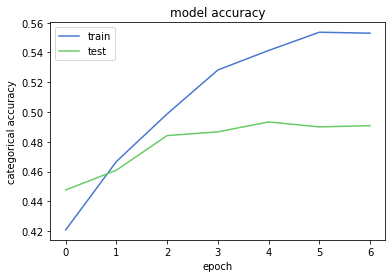

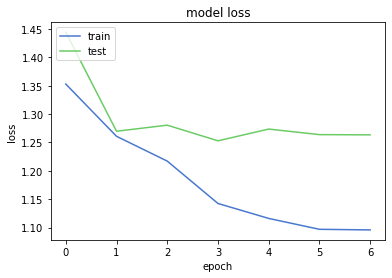

In [ ]:
# plot_history(model_1d_split_hist)

In [ ]:
# pred_y_split = model_1d_split.predict(X_test_split_cnn)

In [ ]:
# pred_y_split.shape

(1505, 6)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.475
Test Set F-score =  0.298
Test Set Precision =  0.318
Test Set Recall =  0.292
Confusion matrix, without normalization
[[ 85  23 100   0   0  12]
 [ 26 119 138   0   0  44]
 [ 42  62 403   0   0  79]
 [  1   1   5   0   0   1]
 [  1   3  16   0   0   2]
 [  7  47 180   0   0 108]]


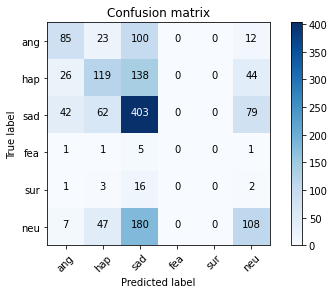

In [ ]:
# display_results(y_test_split, pred_y_split)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [160]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [161]:
from datetime import datetime

In [171]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_2d_lstm' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [67]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [68]:
X_train_split_cnn.shape

(4814, 188, 1)

In [194]:
# #ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_split_2d_lstm = Sequential()
model_split_2d_lstm.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_split_2d_lstm.add(Activation('relu'))
model_split_2d_lstm.add(BatchNormalization())
model_split_2d_lstm.add(Conv2D(128,5,padding='same'))
#model_split_2d_lstm.add(BatchNormalization())
model_split_2d_lstm.add(Dropout(0.2))
# model_split_2d_lstm.add(Conv2D(128 ,5,padding='same'))
# model_split_2d_lstm.add(Activation('relu'))
#model_split_2d_lstm.add(MaxPooling2D(pool_size=(1,1)))
model_split_2d_lstm.add(BatchNormalization())
#model_split_2d_lstm.add(Dropout(0.2))
#model_split_2d_lstm.add(Flatten())
model_split_2d_lstm.add(TimeDistributed(Flatten()))
model_split_2d_lstm.add(GRU(32, return_sequences=False, dropout=0.5))
model_split_2d_lstm.add(Dense(32,kernel_regularizer=l2(0.01)))
model_split_2d_lstm.add(Activation('relu'))
model_split_2d_lstm.add(Dropout(0.25))
model_split_2d_lstm.add(Dense(6))
model_split_2d_lstm.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [195]:
model_split_2d_lstm.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d_lstm = model_split_2d_lstm.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 5s 21ms/step - loss: 1.7232 - sparse_categorical_accuracy: 0.3544 - val_loss: 1.7934 - val_sparse_categorical_accuracy: 0.3920
Epoch 2/30
151/151 [==============================] - 3s 18ms/step - loss: 1.5650 - sparse_categorical_accuracy: 0.3720 - val_loss: 1.5894 - val_sparse_categorical_accuracy: 0.3937
Epoch 3/30
151/151 [==============================] - 3s 18ms/step - loss: 1.4948 - sparse_categorical_accuracy: 0.3887 - val_loss: 1.5111 - val_sparse_categorical_accuracy: 0.3920
Epoch 4/30
151/151 [==============================] - 3s 18ms/step - loss: 1.4360 - sparse_categorical_accuracy: 0.3932 - val_loss: 1.4462 - val_sparse_categorical_accuracy: 0.3970
Epoch 5/30
151/151 [==============================] - 3s 18ms/step - loss: 1.4050 - sparse_categorical_accuracy: 0.4030 - val_loss: 1.3753 - val_sparse_categorical_accuracy: 0.4128
Epoch 6/30
151/151 [==============================] - 3s 18ms/step - loss: 1.3865 - sparse_cate

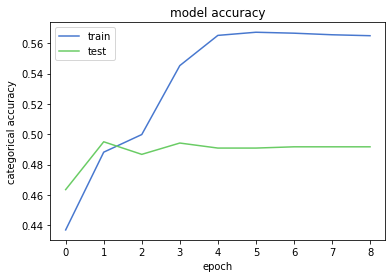

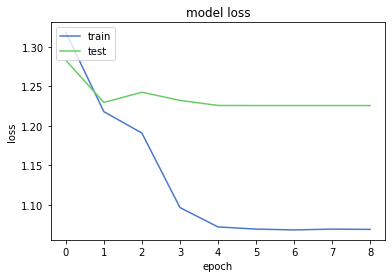

In [ ]:
# plot_history(model_history_split_2d)

In [ ]:
# pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.491
Test Set F-score =  0.316
Test Set Precision =  0.327
Test Set Recall =  0.311
Confusion matrix, without normalization
[[ 89  31  83   0   1  16]
 [ 29 136 124   0   0  38]
 [ 52  61 374   0   0  99]
 [  0   1   6   0   0   1]
 [  1   5  10   0   0   6]
 [ 11  33 158   0   0 140]]


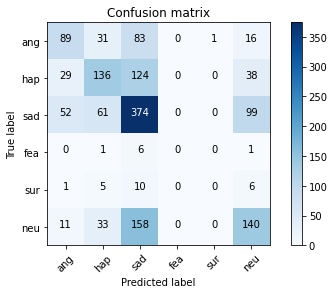

In [ ]:
# display_results(y_test_split, pred_y_2d_split)

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [70]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [71]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [72]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [73]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [74]:
MODEL_NAME = 'distilbert-base-uncased'

In [75]:
MAX_LENGTH = 114

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [76]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1204/1204 [00:00<00:00, 1992.82it/s]


In [125]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(6, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

for layer in model_dbert_split.layers[:3]:
    layer.trainable = False

model_dbert_split.summary()

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFDistilBertModel: ['nsp___cls', 'bert', 'mlm___cls']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['distilbert']
You should probably TRAIN this model on a down-stream task to be able to use it for pred

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_3 (TFDisti TFBaseModelOutput(la 108890112   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_3[0][2

In [126]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_dbert_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [127]:
y_val_split.shape

(1204,)

In [128]:
model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_dbert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 53s 253ms/step - loss: 1.4501 - sparse_categorical_accuracy: 0.3567 - val_loss: 1.3417 - val_sparse_categorical_accuracy: 0.4261
Epoch 2/30
151/151 [==============================] - 34s 229ms/step - loss: 1.3464 - sparse_categorical_accuracy: 0.4132 - val_loss: 1.3094 - val_sparse_categorical_accuracy: 0.4527
Epoch 3/30
151/151 [==============================] - 34s 229ms/step - loss: 1.2744 - sparse_categorical_accuracy: 0.4582 - val_loss: 1.2795 - val_sparse_categorical_accuracy: 0.4651
Epoch 4/30
151/151 [==============================] - 34s 229ms/step - loss: 1.2169 - sparse_categorical_accuracy: 0.4865 - val_loss: 1.2482 - val_sparse_categorical_accuracy: 0.4751
Epoch 5/30
151/151 [==============================] - 34s 228ms/step - loss: 1.1617 - sparse_categorical_accuracy: 0.5166 - val_loss: 1.1985 - val_sparse_categorical_accuracy: 0.5274
Epoch 6/30
151/151 [==============================] - 34s 228ms/step - loss: 1.0803 -

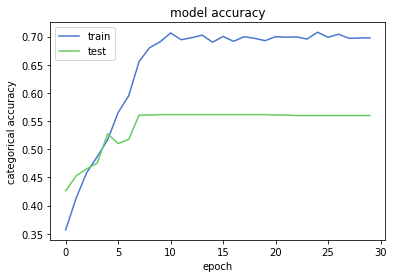

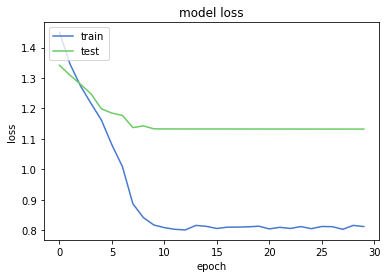

In [129]:
plot_history(model_history_dbert_split)

In [130]:
pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.522
Test Set F-score =  0.364
Test Set Precision =  0.389
Test Set Recall =  0.353
Confusion matrix, without normalization
[[ 75  20 100   0   4  21]
 [ 16 164  98   0   3  46]
 [ 36  68 403   0   1  78]
 [  0   3   2   0   0   3]
 [  4   8   6   0   4   0]
 [  7  52 140   0   4 139]]


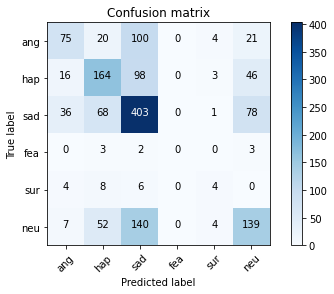

In [131]:
display_results(y_test_split, pred_y_dbert_split)

In [ ]:
# 

In [77]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [78]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [79]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [80]:
MODEL_NAME = 'bert-base-uncased'

In [81]:
MAX_LENGTH = 114

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [82]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1204/1204 [00:00<00:00, 1993.22it/s]


In [ ]:
# config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
# BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

# input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
# input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

# embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
# X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
# X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
# X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
# X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
# X_bert_split = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split)

# model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

# for layer in model_bert_split.layers[:3]:
#     layer.trainable = False

# model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir+'/'+'model_init_bert_split' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_split.shape

(1204,)

In [ ]:
# model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
# 
# model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
#                     y_train_split, 
#                     epochs = 25,
#                     batch_size=32, 
#                     validation_data=(X_val_bert_split_text, y_val_split), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
151/151 [==============================] - 51s 251ms/step - loss: 1.2479 - sparse_categorical_accuracy: 0.4867 - val_loss: 1.1289 - val_sparse_categorical_accuracy: 0.5399
Epoch 2/25
151/151 [==============================] - 35s 229ms/step - loss: 1.1109 - sparse_categorical_accuracy: 0.5422 - val_loss: 1.0726 - val_sparse_categorical_accuracy: 0.5598
Epoch 3/25
151/151 [==============================] - 35s 229ms/step - loss: 1.0186 - sparse_categorical_accuracy: 0.5794 - val_loss: 1.0546 - val_sparse_categorical_accuracy: 0.5706
Epoch 4/25
151/151 [==============================] - 35s 229ms/step - loss: 0.9417 - sparse_categorical_accuracy: 0.6180 - val_loss: 0.9801 - val_sparse_categorical_accuracy: 0.6047
Epoch 5/25
151/151 [==============================] - 34s 229ms/step - loss: 0.8749 - sparse_categorical_accuracy: 0.6419 - val_loss: 1.0347 - val_sparse_categorical_accuracy: 0.6063

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

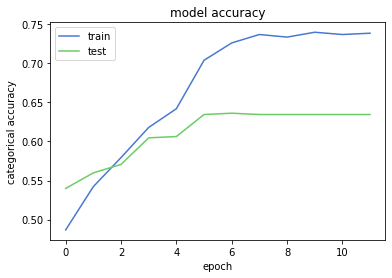

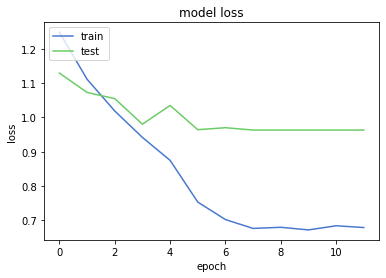

In [ ]:
# plot_history(model_history_bert_split)

In [ ]:
# pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.613
Test Set F-score =  0.448
Test Set Precision =  0.453
Test Set Recall =  0.447
Confusion matrix, without normalization
[[104  12  74   0   8  22]
 [  6 224  43   0   4  50]
 [ 43  35 417   0   2  89]
 [  0   4   2   0   0   2]
 [  3   7   3   0   7   2]
 [ 10  47 109   0   6 170]]


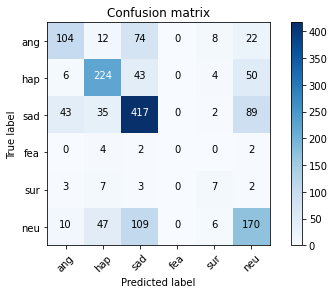

In [ ]:
# display_results(y_test_split, pred_y_bert_split)

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
MAX_LENGTH = 119

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1204/1204 [00:00<00:00, 4324.64it/s]


In [ ]:
# config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
# RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

# input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
# input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

# embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
# X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
# X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
# X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
# X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
# X_roberta_split = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_split)

# model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

# for layer in model_roberta_split.layers[:3]:
#     layer.trainable = False

# model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [ ]:
# curr_dt_time = datetime.now()
# local_filepath = output_dir + '/' + 'model_init_roberta_split' + '/'
# if not os.path.exists(local_filepath):
#     os.mkdir(local_filepath)
# local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

# #filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
# model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
#                                   save_weights_only=True)

# early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
#                                monitor='val_loss', # Look at validation_loss
#                                min_delta=0, # After 0 change
#                                mode='min', # Stop when quantity has stopped decreasing
#                                restore_best_weights=False, # Don't Restore the best weights
#                                verbose=1) 

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
#                               min_lr=0.0000001, # Lower bound of learning rate
#                               patience=1, # Reduce after 1 with little change
#                               mode='min', # Stop when quantity has stopped decreasing
#                               factor=0.1, # Reduce by a factor of 1/10
#                               min_delta=0.01, # Minimumn change needed
#                               verbose=1)

In [ ]:
# y_val_split.shape

(1204,)

In [ ]:
# model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
#                     y_train_split, 
#                     epochs = 30,
#                     batch_size=32, 
#                     validation_data=(X_val_roberta_split_text, y_val_split), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 52s 253ms/step - loss: 1.3991 - sparse_categorical_accuracy: 0.4001 - val_loss: 1.3228 - val_sparse_categorical_accuracy: 0.4352
Epoch 2/30
151/151 [==============================] - 35s 234ms/step - loss: 1.2508 - sparse_categorical_accuracy: 0.4709 - val_loss: 1.1992 - val_sparse_categorical_accuracy: 0.5233
Epoch 3/30
151/151 [==============================] - 35s 234ms/step - loss: 1.1543 - sparse_categorical_accuracy: 0.5393 - val_loss: 1.1944 - val_sparse_categorical_accuracy: 0.5017

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
151/151 [==============================] - 35s 234ms/step - loss: 1.0492 - sparse_categorical_accuracy: 0.5719 - val_loss: 1.0938 - val_sparse_categorical_accuracy: 0.5606
Epoch 5/30
151/151 [==============================] - 35s 234ms/step - loss: 1.0141 - sparse_categorical_accuracy: 0.5987 - val_loss: 1.0876 - val_sparse_categorical_accuracy: 0.5656

Ep

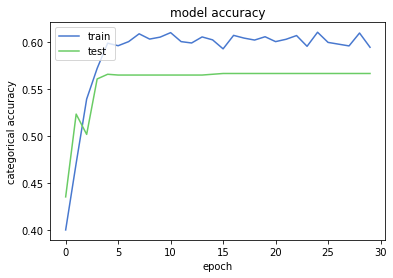

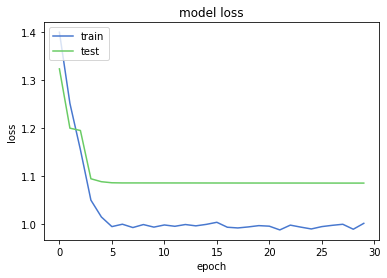

In [ ]:
plot_history(model_history_roberta_split)

In [ ]:
pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.562
Test Set F-score =  0.355
Test Set Precision =  0.374
Test Set Recall =  0.352
Confusion matrix, without normalization
[[ 80  18 108   0   0  14]
 [ 12 214  67   0   0  34]
 [ 37  57 427   0   0  65]
 [  0   1   6   0   0   1]
 [  3   5   8   0   0   6]
 [ 10  53 154   0   0 125]]


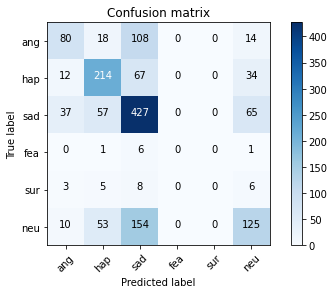

In [ ]:
display_results(y_test_split, pred_y_roberta_split)

In [ ]:
#Session based

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [ ]:
X_val_session_based_cnn.head()

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
8314,0.688393,0.428821,0.654179,0.084598,-0.936268,-0.049682,-0.061827,-0.089192,1.125512,-0.493651,-1.441574,0.364901,-0.193964,-1.570379,-0.937593,-3.477706,-3.127164,0.414352,0.793556,1.410486,0.495904,-0.529697,1.599257,0.849322,-1.393096,-0.652921,-1.126503,-0.567276,1.916499,1.347634,1.663531,3.385818,1.977025,1.888345,1.881010,0.433581,1.523570,2.171873,0.214556,0.088865,...,0.408143,0.511390,0.261115,0.144833,-0.009883,-0.055179,-0.061449,-0.061497,-0.058095,0.030160,0.033046,0.035542,0.037706,0.039593,0.041228,0.042643,0.043889,0.044979,0.045941,0.046785,0.047539,0.048205,0.048800,0.049334,0.049805,0.050227,0.050600,0.050941,0.051246,0.051513,0.051741,0.051952,0.052137,0.052301,0.052436,0.052554,0.052649,0.052724,0.052776,0.052814
8520,-0.202297,-0.240879,-0.202529,-0.272924,-0.375098,-0.043721,-0.197095,-0.190763,0.248852,0.980681,-0.717137,-0.728166,-0.818146,-0.524547,0.323242,-0.940365,-1.377226,0.417894,0.803015,0.683877,-0.856951,-1.804603,-0.059333,0.398404,-1.511724,-1.934776,-0.816014,1.076102,2.523148,0.784843,0.502081,1.385773,-0.072563,-0.582053,0.613077,0.166397,-0.887823,-1.230949,-0.699249,-1.068350,...,-0.100103,-0.099820,-0.099631,-0.085427,-0.070766,-0.063159,-0.061946,-0.061857,-0.073301,-0.077805,-0.077671,-0.078031,-0.078473,-0.078923,-0.079355,-0.079760,-0.080135,-0.080480,-0.080798,-0.081089,-0.081356,-0.081600,-0.081824,-0.082028,-0.082215,-0.082387,-0.082543,-0.082686,-0.082815,-0.082932,-0.083039,-0.083133,-0.083218,-0.083293,-0.083360,-0.083415,-0.083461,-0.083498,-0.083527,-0.083543
9678,-0.048557,-0.101955,-0.028431,-0.187855,-0.316319,-0.017375,-0.174870,-0.163671,0.527226,0.485021,-0.303056,0.345887,1.507859,-0.120287,-0.803287,-0.148677,-0.417485,-0.914305,-0.180633,0.899569,-0.163901,-0.321419,1.605653,0.763821,-1.616913,0.167409,2.015228,-0.639760,-1.758623,0.694285,0.645734,-0.749030,-0.850514,-0.137469,0.057204,-1.002824,-1.187662,-0.370380,-0.623427,-0.955888,...,-0.073002,-0.086075,-0.092338,-0.078627,-0.069631,-0.063034,-0.061985,-0.061872,-0.073786,-0.080974,-0.080646,-0.080840,-0.081134,-0.081451,-0.081764,-0.082061,-0.082339,-0.082596,-0.082834,-0.083053,-0.083254,-0.083438,-0.083608,-0.083763,-0.083906,-0.084038,-0.084157,-0.084266,-0.084365,-0.084454,-0.084536,-0.084609,-0.084674,-0.084732,-0.084784,-0.084826,-0.084861,-0.084890,-0.084912,-0.084925
8708,-0.045336,-0.176960,-0.048427,-0.369871,-0.991781,-0.039270,-0.193249,-0.169399,0.205591,0.417755,-1.013297,1.261360,0.590115,-1.350263,0.611808,-0.616639,-3.198991,-0.202132,-0.073440,-1.704052,-0.360301,-1.196860,-2.675195,-0.414333,0.459858,-0.284645,-0.716680,-0.720093,-0.712075,-0.221175,-0.039289,-0.449444,-0.295846,0.239667,1.139490,3.172430,4.426116,4.592780,4.527676,4.298914,...,-0.000785,-0.043677,-0.059287,-0.058622,-0.051778,-0.061460,-0.061805,-0.061833,-0.073555,-0.079658,-0.079501,-0.079804,-0.080172,-0.080543,-0.080896,-0.081224,-0.081527,-0.081804,-0.082057,-0.082289,-0.082502,-0.082695,-0.082873,-0.083035,-0.083183,-0.083319,-0.083443,-0.083556,-0.083657,-0.083750,-0.083834,-0.083909,-0.083976,-0.084036,-0.084089,-0.084132,-0.084168,-0.084197,-0.084220,-0.084233
9883,-0.541517,-0.553230,-0.550306,-0.539886,0.203959,-0.120664,-0.228038,-0.209531,-1.037376,0.383508,1.087707,0.426490,-0.577244,0.222746,0.791543,0.978233,0.339199,0.475110,0.449383,-0.123236,0.806201,1.295687,1.807993,2.549220,1.577054,1

In [ ]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [ ]:
model_1d_session_based = Sequential()
model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Dropout(0.1))
model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Flatten())
model_1d_session_based.add(Dense(6))
model_1d_session_based.add(Activation('softmax'))
opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_1d_session_based.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 188, 254)          1524      
_________________________________________________________________
activation_10 (Activation)   (None, 188, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 188, 128)          162688    
_________________________________________________________________
dropout_99 (Dropout)         (None, 188, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
activation_11 (Activation)   (None, 23, 128)          

In [ ]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_1d_session' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [ ]:
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
147/147 [==============================] - 2s 8ms/step - loss: 1.3532 - sparse_categorical_accuracy: 0.4279 - val_loss: 1.3042 - val_sparse_categorical_accuracy: 0.4186
Epoch 2/30
147/147 [==============================] - 1s 6ms/step - loss: 1.2632 - sparse_categorical_accuracy: 0.4743 - val_loss: 1.3470 - val_sparse_categorical_accuracy: 0.4292

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
147/147 [==============================] - 1s 6ms/step - loss: 1.1771 - sparse_categorical_accuracy: 0.5220 - val_loss: 1.2928 - val_sparse_categorical_accuracy: 0.4285
Epoch 4/30
147/147 [==============================] - 1s 6ms/step - loss: 1.1541 - sparse_categorical_accuracy: 0.5325 - val_loss: 1.2979 - val_sparse_categorical_accuracy: 0.4247

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
147/147 [==============================] - 1s 6ms/step - loss: 1.1391 - sparse_categorical_accuracy: 0.53

In [ ]:
model_1d_session_based_hist.history

{'loss': [1.3532438278198242,
  1.263218879699707,
  1.1771342754364014,
  1.1540541648864746,
  1.139085054397583,
  1.136257290840149],
 'lr': [0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  1.0000001e-05,
  1.0000001e-06],
 'sparse_categorical_accuracy': [0.4279327094554901,
  0.474345326423645,
  0.5220353603363037,
  0.5324675440788269,
  0.5354481339454651,
  0.538428783416748],
 'val_loss': [1.3041945695877075,
  1.346976399421692,
  1.2928036451339722,
  1.297932505607605,
  1.2976239919662476,
  1.297743320465088],
 'val_sparse_categorical_accuracy': [0.4186222553253174,
  0.4292202889919281,
  0.42846328020095825,
  0.4246782660484314,
  0.4231642782688141,
  0.4231642782688141]}

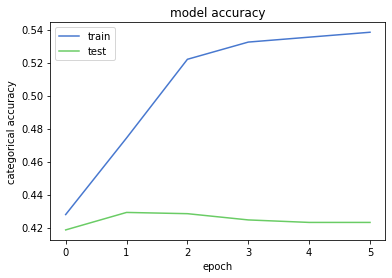

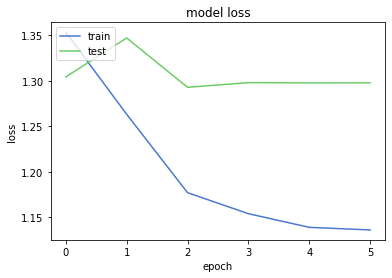

In [ ]:
plot_history(model_1d_session_based_hist)

In [ ]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [ ]:
pred_y_session_based.shape

(1505, 6)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.459
Test Set F-score =  0.284
Test Set Precision =  0.307
Test Set Recall =  0.282
Confusion matrix, without normalization
[[ 93  20  93   0   0  14]
 [ 34  90 157   0   0  46]
 [ 50  44 404   0   0  88]
 [  1   0   5   0   0   2]
 [  1   3  15   0   0   3]
 [ 15  26 197   0   0 104]]


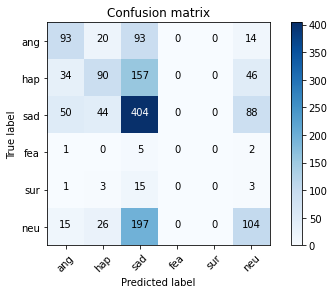

In [ ]:
display_results(y_test_session_based, pred_y_session_based)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' +'model_init_2d_session' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [ ]:
X_train_session_based_cnn.shape

(4697, 188, 1)

In [ ]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_session_based_2d = Sequential()
model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Flatten())
model_session_based_2d.add(Dense(6))
model_session_based_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
147/147 [==============================] - 3s 17ms/step - loss: 1.3259 - sparse_categorical_accuracy: 0.4433 - val_loss: 1.3067 - val_sparse_categorical_accuracy: 0.4254
Epoch 2/30
147/147 [==============================] - 2s 15ms/step - loss: 1.2283 - sparse_categorical_accuracy: 0.4895 - val_loss: 1.3635 - val_sparse_categorical_accuracy: 0.4262

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
147/147 [==============================] - 2s 15ms/step - loss: 1.1381 - sparse_categorical_accuracy: 0.5325 - val_loss: 1.3125 - val_sparse_categorical_accuracy: 0.4383

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
147/147 [==============================] - 2s 15ms/step - loss: 1.1140 - sparse_categorical_accuracy: 0.5525 - val_loss: 1.3170 - val_sparse_categorical_accuracy: 0.4406

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


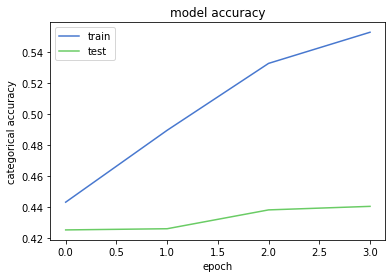

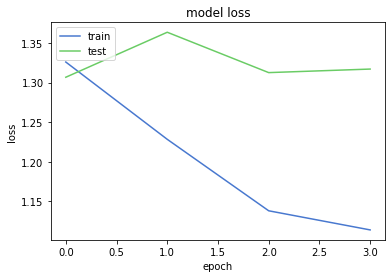

In [ ]:
plot_history(model_history_session_based_2d)

In [ ]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.479
Test Set F-score =  0.301
Test Set Precision =  0.317
Test Set Recall =  0.297
Confusion matrix, without normalization
[[ 89  38  84   0   0   9]
 [ 27 116 133   0   0  51]
 [ 52  54 397   0   0  83]
 [  0   1   6   0   0   1]
 [  1   4  13   0   0   4]
 [ 12  32 179   0   0 119]]


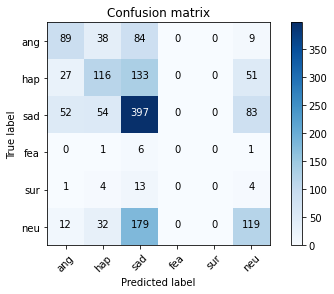

In [ ]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 1321/1321 [00:00<00:00, 2232.42it/s]


In [ ]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_1[0][1

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_dbert_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1321,)

In [ ]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
147/147 [==============================] - 29s 145ms/step - loss: 1.1765 - sparse_categorical_accuracy: 0.5133 - val_loss: 1.1201 - val_sparse_categorical_accuracy: 0.5473
Epoch 2/25
147/147 [==============================] - 19s 128ms/step - loss: 1.0781 - sparse_categorical_accuracy: 0.5640 - val_loss: 1.0442 - val_sparse_categorical_accuracy: 0.5859
Epoch 3/25
147/147 [==============================] - 19s 128ms/step - loss: 1.0070 - sparse_categorical_accuracy: 0.5940 - val_loss: 1.0237 - val_sparse_categorical_accuracy: 0.5973
Epoch 4/25
147/147 [==============================] - 19s 128ms/step - loss: 0.9276 - sparse_categorical_accuracy: 0.6317 - val_loss: 1.0318 - val_sparse_categorical_accuracy: 0.5995

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
147/147 [==============================] - 19s 128ms/step - loss: 0.8045 - sparse_categorical_accuracy: 0.6909 - val_loss: 1.0273 - val_sparse_categorical_accuracy: 0.5973

Ep

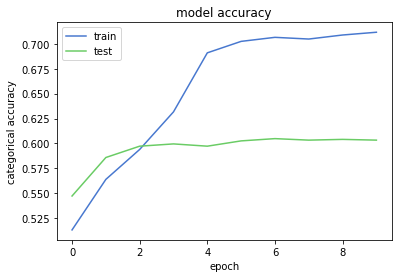

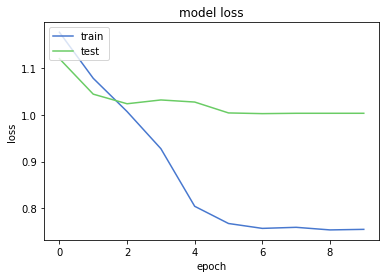

In [ ]:
plot_history(model_history_dbert_session_based)

In [ ]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.601
Test Set F-score =  0.434
Test Set Precision =  0.452
Test Set Recall =  0.423
Confusion matrix, without normalization
[[104  15  80   0   4  17]
 [  8 204  71   0   3  41]
 [ 47  32 425   0   1  81]
 [  0   3   4   0   0   1]
 [  4   5   3   0   5   5]
 [ 11  31 128   0   5 167]]


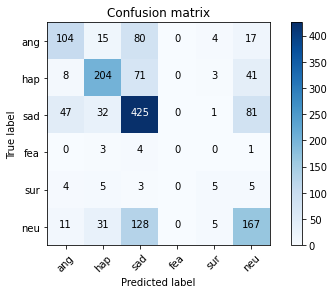

In [ ]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
#from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 1321/1321 [00:00<00:00, 2324.16it/s]


In [ ]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[0][25]     

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_bert_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1321,)

In [ ]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
147/147 [==============================] - 50s 254ms/step - loss: 1.2872 - sparse_categorical_accuracy: 0.4518 - val_loss: 1.0858 - val_sparse_categorical_accuracy: 0.5579
Epoch 2/30
147/147 [==============================] - 34s 234ms/step - loss: 1.1267 - sparse_categorical_accuracy: 0.5306 - val_loss: 1.0804 - val_sparse_categorical_accuracy: 0.5655

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
147/147 [==============================] - 34s 235ms/step - loss: 1.0119 - sparse_categorical_accuracy: 0.5823 - val_loss: 1.0271 - val_sparse_categorical_accuracy: 0.5958
Epoch 4/30
147/147 [==============================] - 34s 234ms/step - loss: 0.9691 - sparse_categorical_accuracy: 0.6085 - val_loss: 1.0095 - val_sparse_categorical_accuracy: 0.5958
Epoch 5/30
147/147 [==============================] - 34s 235ms/step - loss: 0.9518 - sparse_categorical_accuracy: 0.6102 - val_loss: 1.0099 - val_sparse_categorical_accuracy: 0.5950

Ep

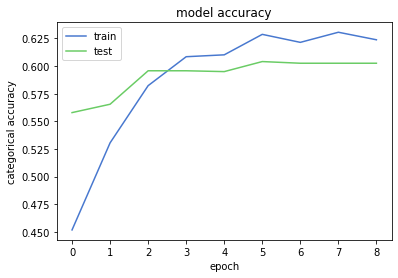

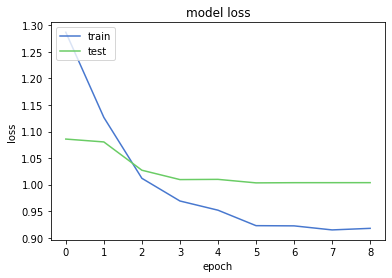

In [ ]:
plot_history(model_history_bert_session_based)

In [ ]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.565
Test Set F-score =  0.395
Test Set Precision =  0.416
Test Set Recall =  0.386
Confusion matrix, without normalization
[[ 84  17  99   0   4  16]
 [  7 212  67   0   3  38]
 [ 44  38 418   0   1  85]
 [  0   3   4   0   0   1]
 [  2   6   8   0   4   2]
 [ 13  50 141   0   5 133]]


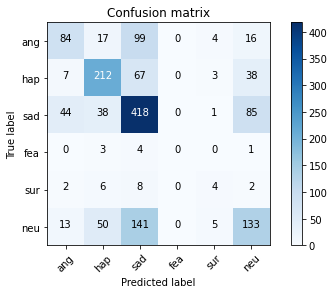

In [ ]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [ ]:
#from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
MAX_LENGTH = 119

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 1321/1321 [00:00<00:00, 4428.80it/s]


In [ ]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model_1[0][25]  

In [ ]:
curr_dt_time = datetime.now()
local_filename = output_dir + '/' + 'model_init_roberta_sb' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1321,)

In [ ]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
147/147 [==============================] - 51s 260ms/step - loss: 1.4241 - sparse_categorical_accuracy: 0.3704 - val_loss: 1.2973 - val_sparse_categorical_accuracy: 0.4497
Epoch 2/30
147/147 [==============================] - 35s 240ms/step - loss: 1.2770 - sparse_categorical_accuracy: 0.4522 - val_loss: 1.1920 - val_sparse_categorical_accuracy: 0.4981
Epoch 3/30
147/147 [==============================] - 35s 240ms/step - loss: 1.1945 - sparse_categorical_accuracy: 0.5084 - val_loss: 1.1856 - val_sparse_categorical_accuracy: 0.5034

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
147/147 [==============================] - 35s 240ms/step - loss: 1.0848 - sparse_categorical_accuracy: 0.5697 - val_loss: 1.0790 - val_sparse_categorical_accuracy: 0.5678
Epoch 5/30
147/147 [==============================] - 35s 240ms/step - loss: 1.0526 - sparse_categorical_accuracy: 0.5725 - val_loss: 1.0621 - val_sparse_categorical_accuracy: 0.5738
Epo

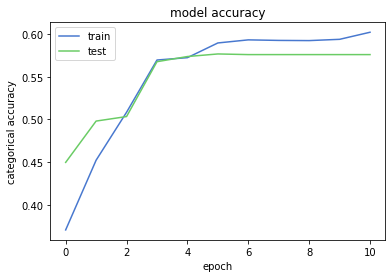

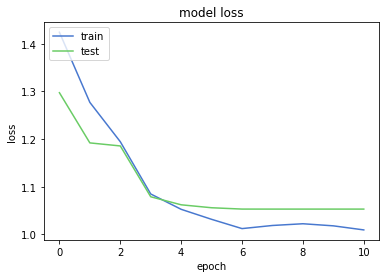

In [ ]:
plot_history(model_history_roberta_session_based)

In [ ]:
pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.553
Test Set F-score =  0.357
Test Set Precision =  0.368
Test Set Recall =  0.354
Confusion matrix, without normalization
[[ 84  22  93   0   0  21]
 [ 12 210  61   0   0  44]
 [ 41  57 391   0   0  97]
 [  0   3   4   0   0   1]
 [  3   5   8   0   0   6]
 [  6  54 134   0   0 148]]


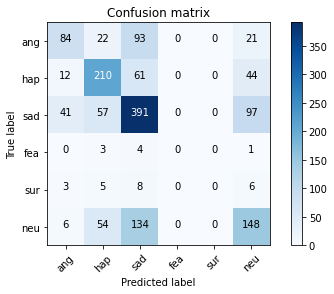

In [ ]:
display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
model_1d_name = output_dir+'/model_init_1d/'+'model-00007-0.55297-1.09585-0.49086-1.263382021-10-1607_34_17.890873.h5'
model_2d_name = output_dir +'/model_init_2d/' + 'model-00009-0.56502-1.06881-0.49169-1.225792021-10-1607_42_54.843947.h5'
#model_dbert_name = 

In [85]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)

In [86]:
y_ens_1d_pred = model_1d_ens.predict(X_test_split_cnn)

In [87]:
y_ens_2d_pred = model_2d_ens.predict(X_test_split_cnn_2d)

In [122]:
config_db_split_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split_ens)

input_ids_in_db_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split_ens = DistilBERT_split_ens(input_ids = input_ids_in_db_split_ens, attention_mask = input_masks_in_db_split_ens)[0]
X_db_split_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split_ens)
X_db_split_ens = tf.keras.layers.GlobalMaxPool1D()(X_db_split_ens)
X_db_split_ens = tf.keras.layers.Dense(64, activation='relu')(X_db_split_ens)
X = tf.keras.layers.Dropout(0.2)(X_db_split_ens)
X_db_split_ens = tf.keras.layers.Dense(6, activation='softmax')(X_db_split_ens)

model_dbert_split_ens = tf.keras.Model(inputs=[input_ids_in_db_split_ens, input_masks_in_db_split_ens], outputs = X_db_split_ens)

#for layer in model_dbert_split_ens.layers[:3]:
#    layer.trainable = False

model_dbert_split_ens.summary()

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFDistilBertModel: ['nsp___cls', 'bert', 'mlm___cls']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['distilbert']
You should probably TRAIN this model on a down-stream task to be able to use it for pred

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 108890112   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_1[0][2

In [124]:
config_db_split_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split_ens)

input_ids_in_db_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split_ens = DistilBERT_split_ens(input_ids = input_ids_in_db_split_ens, attention_mask = input_masks_in_db_split_ens)[0]
X_db_split_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split_ens)
X_db_split_ens = tf.keras.layers.GlobalMaxPool1D()(X_db_split_ens)
X_db_split_ens = tf.keras.layers.Dense(64, activation='relu')(X_db_split_ens)
X = tf.keras.layers.Dropout(0.2)(X_db_split_ens)
X_db_split_ens = tf.keras.layers.Dense(6, activation='softmax')(X_db_split_ens)

model_dbert_split_ens = tf.keras.Model(inputs=[input_ids_in_db_split_ens, input_masks_in_db_split_ens], outputs = X_db_split_ens)
model_dbert_split_ens.summary()

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFDistilBertModel: ['nsp___cls', 'bert', 'mlm___cls']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['distilbert']
You should probably TRAIN this model on a down-stream task to be able to use it for pred

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_2 (TFDisti TFBaseModelOutput(la 108890112   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_2[0][2

In [132]:
model_dbert_split_ens.load_weights(output_dir+'/model_init_dbert_split/'+'model-00008-0.65600-0.88668-0.56063-1.136912021-10-1711_03_17.045847.h5')

In [134]:
y_ens_dbert_split_pred = model_dbert_split_ens.predict(X_test_dbert_split_text)

In [92]:
config_bert_split_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split_ens)

input_ids_in_bert_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split_ens = BERT_split_ens(input_ids = input_ids_in_bert_split_ens, attention_mask = input_masks_in_bert_split_ens)[0]
X_bert_split_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split_ens)
X_bert_split_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dropout(0.2)(X_bert_split_ens)
X_bert_split_ens = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split_ens)

model_bert_split_ens = tf.keras.Model(inputs=[input_ids_in_bert_split_ens, input_masks_in_bert_split_ens], outputs = X_bert_split_ens)

#for layer in model_bert_session_based.layers[:3]:
#    layer.trainable = False

model_bert_split_ens.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[0][25]     

In [103]:
model_bert_split_ens.load_weights(output_dir+'/model_init_bert_split/model-00012-0.73868-0.67929-0.63455-0.963092021-10-1608_18_20.876536.h5')

In [104]:
X_test_bert_split_text

(array([[ 101, 2416, 2176, ...,    0,    0,    0],
        [ 101, 2092, 1045, ...,    0,    0,    0],
        [ 101, 3100, 2307, ...,    0,    0,    0],
        ...,
        [ 101, 2026, 2190, ...,    0,    0,    0],
        [ 101, 2045, 2024, ...,    0,    0,    0],
        [ 101, 2748, 1012, ...,    0,    0,    0]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32))

In [105]:
y_ens_bert_split_pred = model_bert_split_ens.predict(X_test_bert_split_text)

In [135]:
y_ens_all_pred = array([y_ens_1d_pred,y_ens_2d_pred,y_ens_bert_split_pred,y_ens_dbert_split_pred])

In [157]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,3,6,3], axes=((0),(0)))

In [158]:
y_ens_summed_pred.shape

(1505, 6)

Test Set Accuracy =  0.648
Test Set F-score =  0.460
Test Set Precision =  0.489
Test Set Recall =  0.445
Confusion matrix, without normalization
[[113   8  84   0   4  11]
 [  2 226  56   0   3  40]
 [ 38  25 465   0   2  56]
 [  0   2   5   0   0   1]
 [  3   4   7   0   4   4]
 [  3  33 136   0   3 167]]


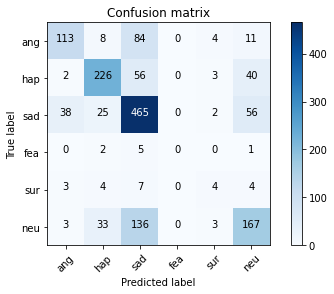

In [159]:
display_results(y_test_split,y_ens_summed_pred)

In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)